In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from matplotlib.lines import Line2D
from matplotlib.legend import Legend
import seaborn as sns
from scipy.stats import pearsonr

Download data from the data folder.

In [3]:
simulation_data = pd.read_csv("../data/simulation_data.csv") 
delta_df = pd.read_csv("../data/main_experiment/deltas.csv") 
delta_pilot =  pd.read_csv("../data/pilot/deltas.csv") 
results_df = pd.read_csv("../data/main_experiment/delta_behavior_validation_all_splits.csv")  
results_df_pilot = pd.read_csv("../data/pilot/pilot_delta_behavior_validation_all_splits.csv")  

(simulation.py) Plot simulation data

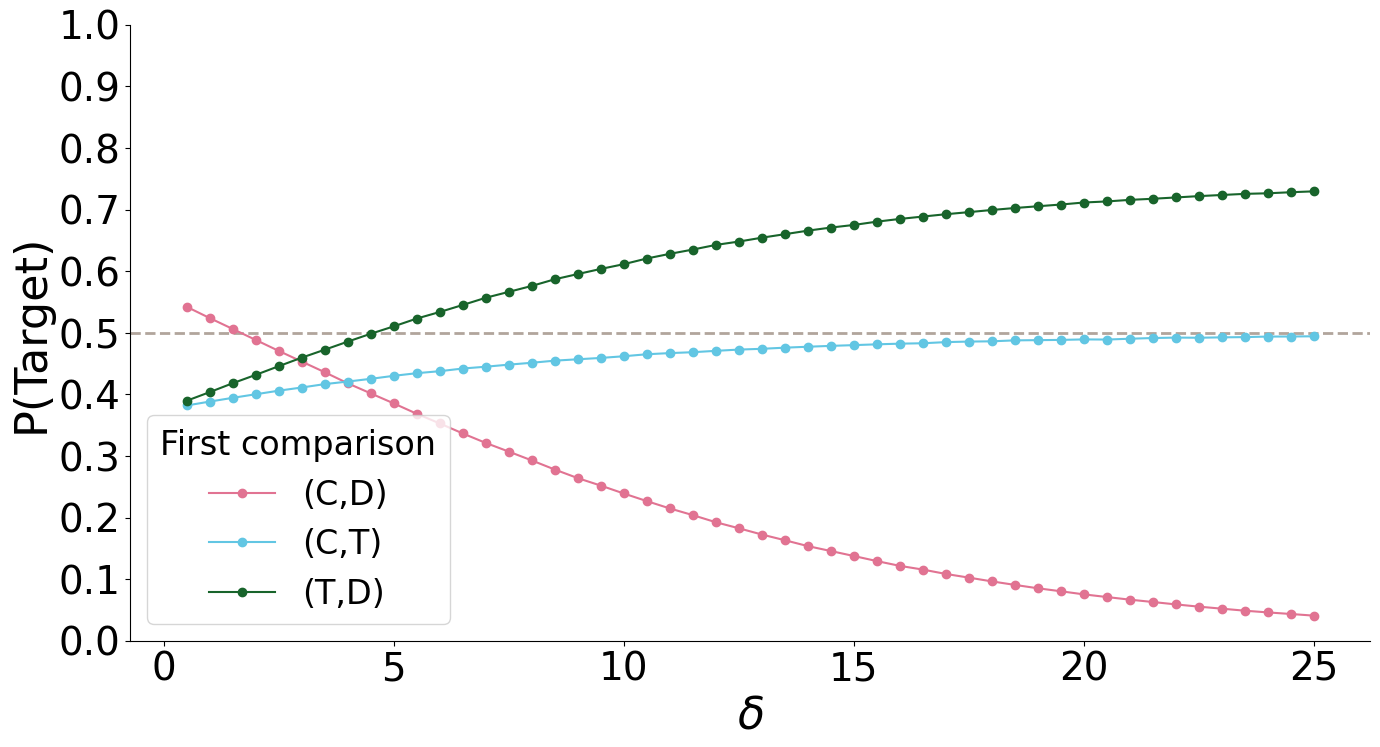

In [4]:
average_df = simulation_data.groupby('delta').mean().reset_index()
average_df = average_df[average_df['delta'] <= 25]
average_df = average_df.rename(columns={'(D,T)': '(T,D)'})

n_deltas = 25
figure_value = 28

# Plot all columns
average_df.set_index('delta', inplace=True)
color_map = {'(C,D)': '#e17392', '(C,T)': '#62c6e3', '(T,D)': '#18642b'}   
plt.figure(figsize=(16, 8))  # Add this line - (width, height)
# plt.axhspan(0.5, 0.8, facecolor='#b1a59c', alpha=0.2, zorder=0)
average_df.plot(marker='o', color=color_map, ax=plt.gca())  
# plt.xlabel('Subjective value boost ($\\delta$)', fontsize=figure_value + 4)
plt.xlabel('$\\delta$', fontsize=figure_value + 4)
plt.ylabel('P(Target)', fontsize=figure_value + 4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(title='First comparison', fontsize = figure_value - 4, title_fontsize = figure_value -4, loc='lower left')
plt.xticks(np.arange(0, n_deltas + 1, 5), fontsize=figure_value)
plt.yticks(np.arange(0, 1.1, .1), fontsize=figure_value)
plt.axhline(y=0.5, linestyle='--', color='#b1a59c', linewidth=2, zorder=0)
# plt.savefig('simulation.pdf', dpi=1000) # To save pdf, remove the '#'
plt.show()



(model_fitting.py) Plot the delta histograms for the pilot and main experiments. To save each pdf, uncomment the plt.savefig. You can also change the name of the figure saved by changing the plt.savefig(). Right now, it will save as delta_histogram

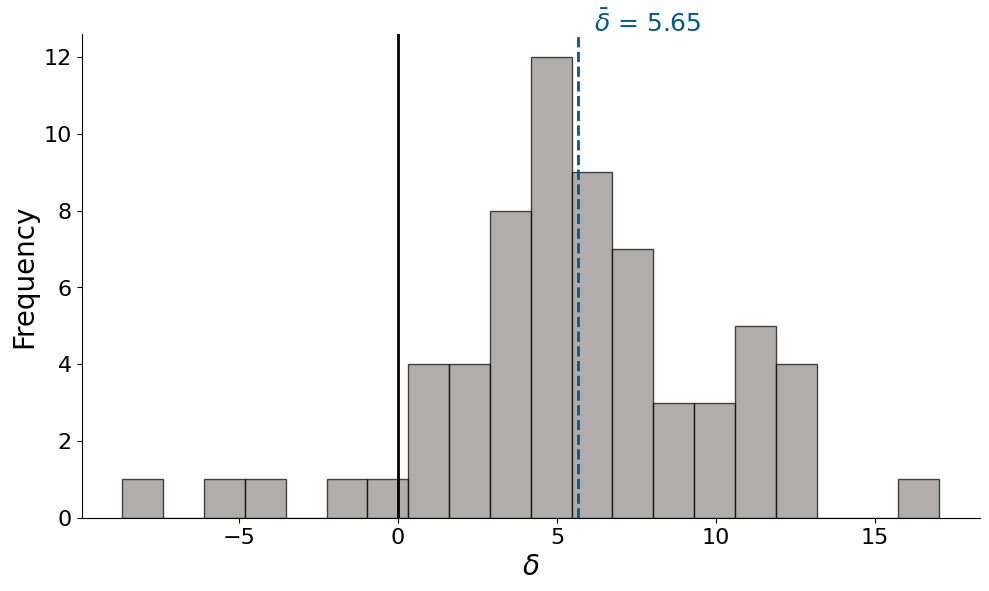

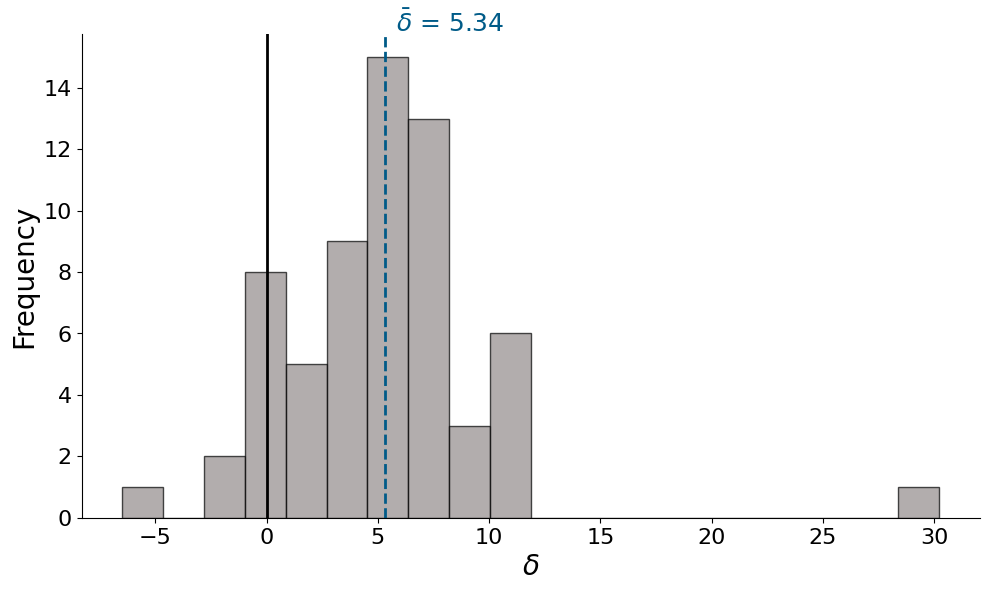

In [16]:
def plot_delta(delta_df):
        plt.figure(figsize=(10, 6))
        plt.hist(delta_df["delta_delta"], bins=20, edgecolor='black', alpha=0.7, color='#928b8b')

        mean_delta = np.mean(delta_df["delta_delta"])
        plt.axvline(x=mean_delta, color='#005b88', linestyle='--', linewidth=2)
        plt.axvline(x=0, color='black', linewidth=2)
        plt.text(mean_delta + 0.5, plt.ylim()[1] * 1.05, f'$\\bar{{\\delta}}$ = {mean_delta:.2f}', 
                color='#005b88', fontsize=18, verticalalignment='top')
        plt.xlabel('$\\delta$', fontsize=20)
        plt.ylabel('Frequency', fontsize=20)
        plt.tick_params(axis='both', which='major', labelsize=16)
        plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.tight_layout()
        # plt.savefig('delta_histogram.pdf', dpi=300)
        plt.show()

plot_delta(delta_df)
plot_delta(delta_pilot)



(cross_validation.py) Plot the 1,000 correlations of delta and behavioral prediction for the pilot and main experiments. To save each pdf, uncomment the plt.savefig. You can also change the name of the figure saved by changing the plt.savefig(). Right now, it will save as correlation_histogram

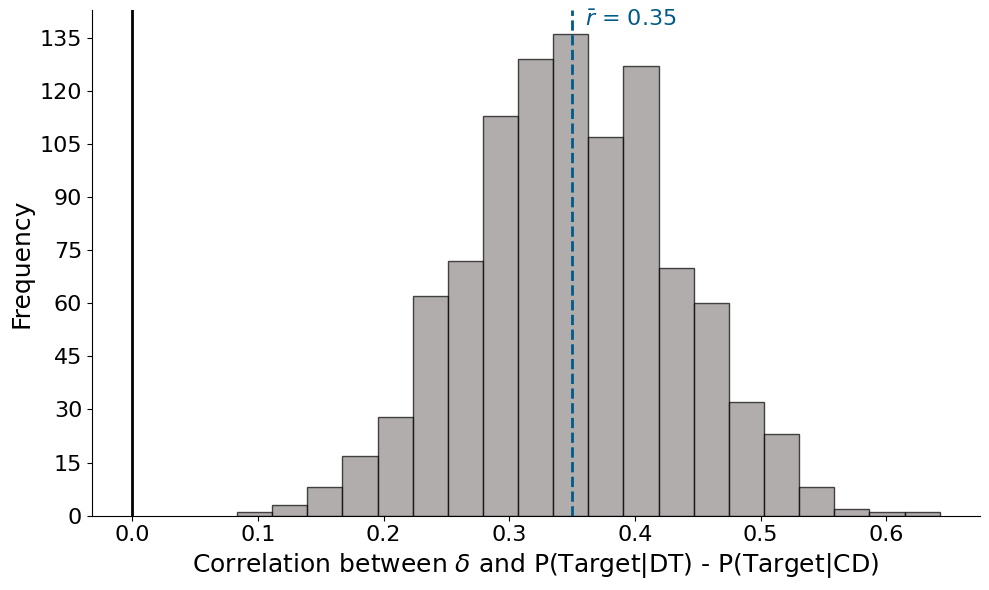


=== Correlation Statistics ===
Mean correlation: 0.350
Std correlation: 0.083
Min correlation: 0.083
Max correlation: 0.643
Median correlation: 0.346


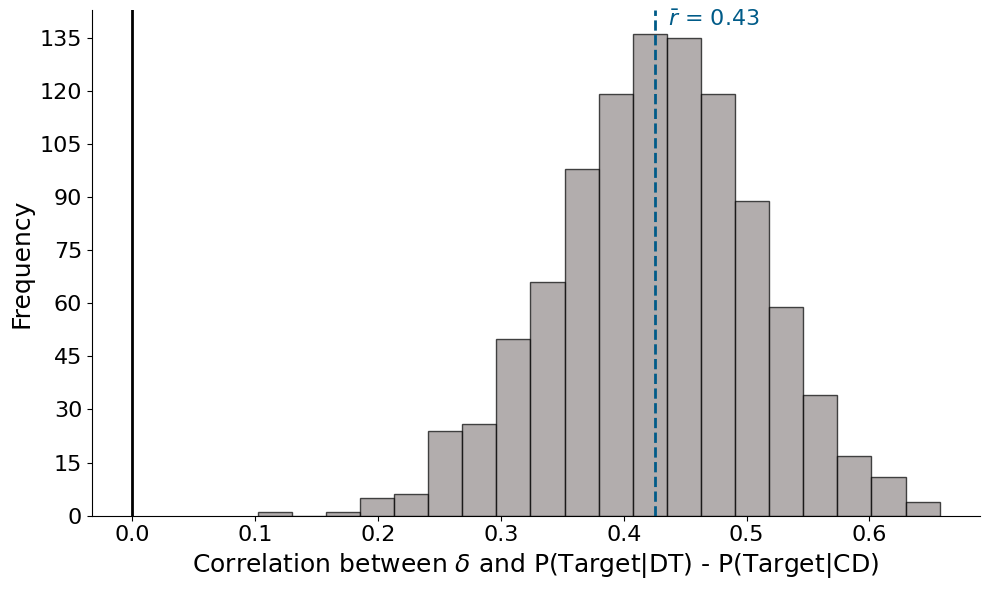


=== Correlation Statistics ===
Mean correlation: 0.426
Std correlation: 0.082
Min correlation: 0.102
Max correlation: 0.657
Median correlation: 0.427


In [5]:
def plot_correlation(results_df):
        correlations = []
        n_splits = 1000   
        for split_i in range(n_splits):
                split_data = results_df[results_df['split_i'] == split_i]
                
                # Remove NaN values
                valid_mask = ~(split_data['delta'].isna() | split_data['behavior_diff'].isna())
                if valid_mask.sum() > 1:  # Need at least 2 points for correlation
                        corr = split_data[valid_mask][['delta', 'behavior_diff']].corr().iloc[0, 1]
                        correlations.append(corr)

        correlations = np.array(correlations)

        # PLOT HISTOGRAM OF CORRELATIONS
        plt.figure(figsize=(10, 6))
        plt.hist(correlations, bins=20, edgecolor='black', alpha=0.7, color='#928b8b')

        mean_corr = np.mean(correlations)
        plt.axvline(x=mean_corr, color='#005b88', linestyle='--', linewidth=2)
        plt.axvline(x=0, color='black', linewidth=2)

        plt.text(mean_corr + 0.01, plt.ylim()[1] * 1, f'$\\bar{{r}}$ = {mean_corr:.2f}', 
                color='#005b88', fontsize=16, verticalalignment='top')
        plt.xlabel('Correlation between $\\delta$ and P(Target|DT) - P(Target|CD)', fontsize=18)
        plt.ylabel('Frequency', fontsize=18)
        plt.tick_params(axis='both', which='major', labelsize=16)  # Larger tick labels
        plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.tight_layout()
       # plt.savefig('correlation_histogram.pdf', dpi=300)
        plt.show()

        # === SUMMARY STATISTICS ===
        print("\n=== Correlation Statistics ===")
        print(f"Mean correlation: {np.mean(correlations):.3f}")
        print(f"Std correlation: {np.std(correlations):.3f}")
        print(f"Min correlation: {np.min(correlations):.3f}")
        print(f"Max correlation: {np.max(correlations):.3f}")
        print(f"Median correlation: {np.median(correlations):.3f}")

plot_correlation(results_df)
plot_correlation(results_df_pilot)